# Analyze A/B Test Results 


- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

<a id='intro'></a>
## Introduction
The goal of this project is to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

<a id='probability'></a>
## Part I - Probability

Importing libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)



### Task 1.1
`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 


In [3]:
#Get the data
df = pd.read_csv('ab_data.csv')       #reading the csv file into df

Below is the description of the data, there are a total of 5 columns:
<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [4]:
df.head()                         #displays the top 5 rows

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [5]:
dfLen = len(df. index)                 #counting the rows and storing for future use
dfLen

294478

**c.** The number of unique users in the dataset.

In [6]:
df.user_id.nunique()          #function counts the unique values in the column user_id

290584

**d.** The proportion of users converted.

In [7]:
cu = (df.converted.sum()/dfLen)*100               #using the results for number of rows to divide the sum of converted
cu

11.96591935560551

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [8]:
#creating a variable to hold the rows that have the group set to treatment and landing page is not new page
treatment = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]  

#creating a variaple to hold the rows that have the group set to control, and landing page in not old page
control = df[(df['group'] == 'control') & (df['landing_page'] != 'old_page')]

#print results
print("Incorrect page for treatment group:", len(treatment))
print("Incorrect page for control group:", len(control))

Incorrect page for treatment group: 1965
Incorrect page for control group: 1928


**f.** Do any of the rows have missing values?

In [9]:
df.isnull().values.any()  #using the function isnull and any to check for null values

False

### 1.2  

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.copy()

df2.drop(df2.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df2.drop(df2.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)
df2


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### 1.3  

**a.** How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()          #function counts the unique values in the column user_id in df2

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
duplicateID = df2[df2.duplicated(['user_id'])]                     #finding duplicate user ID
duplicateID                                                        #displaying results

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [14]:
IDdupeRow = df2[df2['user_id'].duplicated(keep=False)]          #storing the information for the duplicate IDs in IDdupeRow
IDdupeRow                                                       #displaying results

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
# Duplicates are on lines 1899 and 2892, so one of these rows can be dropped
# Check again if the row with a duplicate user_id is deleted or not

df2.drop_duplicates('user_id', inplace=True)

duplicateID = df2[df2.duplicated(['user_id'])]                     #finding duplicate user ID
duplicateID 

,user_id,timestamp,group,landing_page,converted


### 1.4  


<br>
>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.

a. What is the probability of an individual converting regardless of the page they receive?


In [16]:
#calculating probability of conversion independent of what page they receive
prob_conversion = df2.converted.mean()
prob_conversion


0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
prob_control_conv = df2[df2['group']=='control']['converted'].mean()
prob_control_conv

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
prob_treatment_conv = df2[df2['group']=='treatment']['converted'].mean()
prob_treatment_conv

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [19]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = prob_treatment_conv-prob_control_conv
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [20]:
prob_np = (df2['landing_page'] == 'new_page').mean()
prob_np

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**The control group receiving the old landing page is slightly higher than those in the treatment group receiving the new landing page. This indicates that there may be a negative correlation between the new landing page and conversions of users.**

<a id='ab_test'></a>
## Part II - A/B Test


### 2.1
Consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

##### Null Hypothesis:

>*$p_{new}$ - $p_{old}$  $\leq$ 0*

##### Alternative Hypothesis:

>*$p_{new}$ - $p_{old}$  $\gt$ 0*

### 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [21]:
p_new = df2["converted"].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [22]:
p_old = df2["converted"].mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [23]:
n_new = (df2['group'] == 'treatment').sum()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = (df2['group'] == 'control').sum()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [25]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new, (1-p_new)])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [26]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [27]:
conv_dif = p_new-p_old
conv_dif

0.0


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [28]:
# Sampling distribution 
# running simulation from above 10,000 times

p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new, (1-p_new)])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old, (1-p_old)])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.


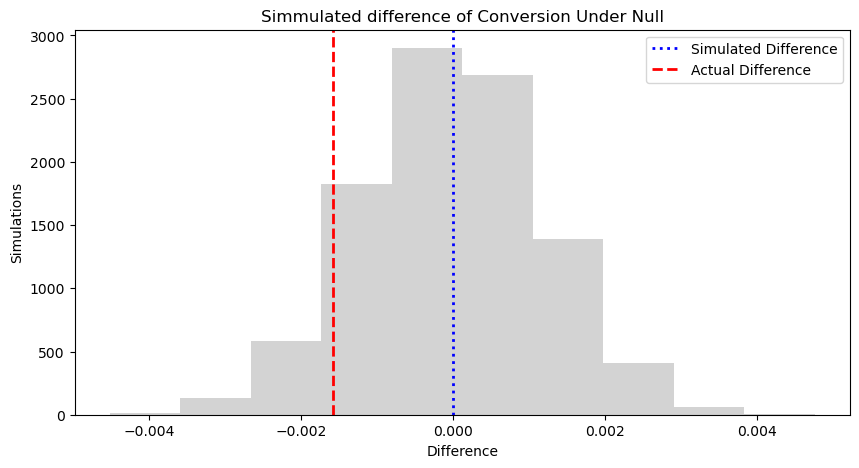

In [29]:
sim_diff = p_new-p_old

plt.figure(figsize=(10, 5))
plt.hist(p_diffs, color='lightgray')
plt.title("Simmulated difference of Conversion Under Null")
plt.ylabel("Simulations")
plt.xlabel("Difference")
plt.axvline(x=sim_diff, color='blue', linewidth=2, linestyle='dotted', label="Simulated Difference")
plt.axvline(x =(obs_diff), color='red', linewidth=2, linestyle='dashed', label="Actual Difference")
plt.legend()
plt.show();

<i>The mean is close to zero in the simulated data. This is expected behavior under the null hypothesis.</i>

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
#calculating the proportion of p_diffs that are greater than the actual difference

(p_diffs>obs_diff).mean()


0.9071

**k.** Please explain in words what you have just computed in part **j** above. 




<i>The actions performed in the previous step calculated the proportion of the p_diffs that are greater than the actual data.</i>  
    
###### What is this value called in scientific studies?
This value is called the <b>p-value</b>  

##### What does this value signify in terms of whether or not there is a difference between the new and old pages?  
In this instance, the p-value is .9065, which is well above what we would expect a p-value to be if the the actual difference were true under the null hypothesis. (We would expect the p-value to be 0.05 or lower if the null were true.




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: df2.query("group == 'control'")['converted'].sum()
- `convert_new`: df2.query("group == 'treatment'")['converted'].sum() 
- `n_old`: (df2['landing_page'] == 'old_page').sum()
- `n_new`: (df2['landing_page'] == 'new_page').sum()


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("group == 'control' & converted == 1")['converted'].count()

# number of conversions with the new_page
convert_new = df2.query("group == 'treatment' & converted == 1")['converted'].count()

# number of individuals who were shown the old_page
n_old = n_old

# number of individuals who received new_page
n_new = n_new

print('convert_old:  ', convert_old,
      '\tconvert_new:', convert_new,
      '\n\tn_old:', n_old,
      '\t      n_new:', n_new)

convert_old:   17489 	convert_new: 17264 
	n_old: 145274 	      n_new: 145310


**m.** Now use sm.stats.proportions_ztest() to compute your test statistic and p-value. 

In [32]:
#proportions_ztest(count_array, nobs_array, alternative='larger')
#Complete the sm.stats.proportions_ztest() method arguments

import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative="larger")
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>*The zscore is -1.31 and the p-value is 0.905 which aligns with the previous computations performed. In both instances the p-value is approximately 0.91 which rejects the null.*


<a id='regression'></a>
### Part III - A regression approach

### 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br>
**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>*Conversion/No Conversion should use a logistic regression*

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
#first create a copy of the dataset to make these changes
#creating the columns intercept and ab_page with the desinated values and using dummy variables

df3 = df2

df3["intercept"] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [34]:
#instantiating regression model
#statsmodels has been imported as sm

logistic_mod = sm.Logit(df3["converted"], df3[["intercept", "ab_page"]])
results1 = logistic_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:               8.077e-06
Time:                        13:01:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [36]:
#Displaying a sample

df3[df3["group"]=="treatment"].head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0


**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>The original p-value was ~.91.  
    Here we see that the p-value for the ab_page is 0.19  <br><br>
    The reason for the difference is that in the first calculation for p-value, the null was that the new page would present an increase in conversions than the old page.  
    In the logistic regression, the calculation is a two-tailed test with an intercept. <br><br>
    In both cases, the p-value is larger than the threshhold of 0.05 and thus both reject the null hypothesis.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>When conducting tests of this nature that will be guiding business decisions, it is a good idea to include factors that can have a large impact on the outcome. <br><br>
In a case such as the one conducted here, there are other quantitative factors that could possibly be useful for evaluating the website. For instance, heat mapping to guage the most popular areas of the page could prove insight for future development. <br><br>
On the other hand, caution must be utilized when adding factors to the regression model as they could 'muddy the water' so to speak.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [37]:
# Read the countries.csv
dfc = pd.read_csv('countries.csv')
dfc.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# Join with the df2 dataframe
df_merged = dfc.set_index("user_id").join(df3.set_index("user_id"), how="inner")

df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [39]:
# Create the necessary dummy variables
dummy_country= pd.get_dummies(df_merged["country"])[["US", "UK", "CA"]]
df_merged2 = df_merged.join(dummy_country)
df_merged2.head(2)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,US,UK,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0


In [40]:
#Question from above:
#Does it appear that country had an impact on conversion? 
#Provide statistical output and written response.

#instantiating regression model
log_mod_countries= sm.Logit(df_merged2["converted"], df_merged2[["intercept","UK", "US"]])

results2 = log_mod_countries.fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [41]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:               1.521e-05
Time:                        13:01:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

>*When checking to see if country had any bearing on the conversion rates, the model shows no difference. Country p-values are above .05<br>
While the conversions for the new page in the US do seem to have improved slightly with a p-value of .074, this is still not statistically significant and the null hypothesis is still invalid*

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [49]:
# Fit your model
#log_mod_page_country= sm.Logit(df_merged2["converted"], df_merged2[["intercept","UK", "US", "ab_page"]])
#joined_data['UK_ind_ab_page'] = joined_data['UK_ind']*joined_data['ab_page']

df_merged2["ab_country_UK"] = df_merged2["UK"]*df_merged2["ab_page"]
df_merged2["ab_country_US"] = df_merged2["US"]*df_merged2["ab_page"]
#results3 = df_merged2.fit()

In [51]:
df_merged3 = sm.Logit(df_merged2["converted"], df_merged2[["intercept","ab_country_UK", "ab_country_US"]])
results3 = df_merged3.fit()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


In [52]:
#Show results
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:               1.082e-05
Time:                        13:18:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.9926      0.008   -252.910      0.000      -2.008      -1.977
ab_country_UK     0.0112      0.018      0.626      0.532      -0.024       0.046
ab_country_US    -0.0144      0.012     -1.155      0.248      -0.039       0.010
=================================================================================
"""

>*As seen in previous models, the p-values remain above 0.05 for all tested variables. This shows us that the interaction between page and country have no statistically significant effect on conversion.*

### Resources:

##### https://pandas.pydata.org/
##### https://www.statsmodels.org/
##### https://www.geeksforgeeks.org/
##### https://statology.org
##### https://towardsdatascience.com
##### Reviewer Notes :)

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

4294967295